<a href="https://colab.research.google.com/github/NaomiKemi/critical-theory/blob/main/Assignment%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Five Personality Traits Clustering with K-Means and
# Assigment 3

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:

* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extroversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)


This data set was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed from the IPIP. You can see more from https://www.kaggle.com/datasets/tunguz/big-five-personality-test


The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

You can see the questions in the codebook.txt or at the https://ipip.ori.org/new_ipip-50-item-scale.htm website and from the Goldberg paper

Resources:

[1].Goldberg, L. R. (1992). The development of markers for the Big-Five factor structure. Psychological Assessment, 4, 26-42.

[2]https://openpsychometrics.org/tests/IPIP-BFFM/




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the Data Set
The dataset is quite big, it might take a while.

In [ ]:

data = pd.read_csv('data/data-small.csv')
pd.options.display.max_columns = 150

print('Number of participants: ', len(data))
data.head()


Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


## Understanding the Data Set

In [ ]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  4504
Number of participants after eliminating missing values:  49906


In [ ]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [ ]:
#Load in questions databank
import json
with open("data/questions.json", "r") as fp:
    questions = json.load(fp)
traits = list(questions.keys())
colours = plt.colormaps.get("rainbow")

In [ ]:
#Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

def questions_for_trait(trait):
    return list(questions[trait].values())

#Plot histogram for responses to each question
def vis_questions(trait, color):
    fig, ax = plt.subplots(2,5,figsize=(12,2))
    plt.subplots_adjust(bottom=0, top=2.5)
    qs = questions_for_trait(trait)
    codes = keys_for_trait(trait)
    for i in range(10):
        plot = ax[int(np.floor(i/5)),i%5]
        plot.hist(data[codes[i]], bins=14, color= color, alpha=.5)
        plot.set_title(qs[i], fontsize=8)
        plot.set_yticks([])
        plot.set_xticks(np.arange(0,6))

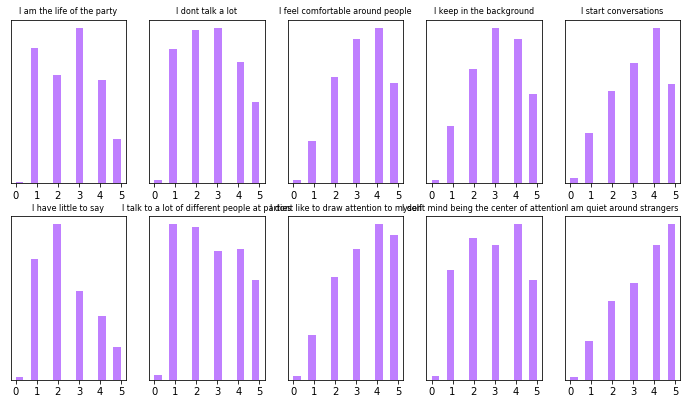

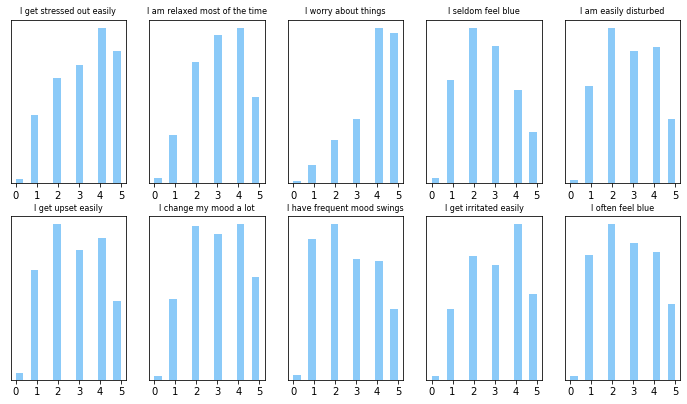

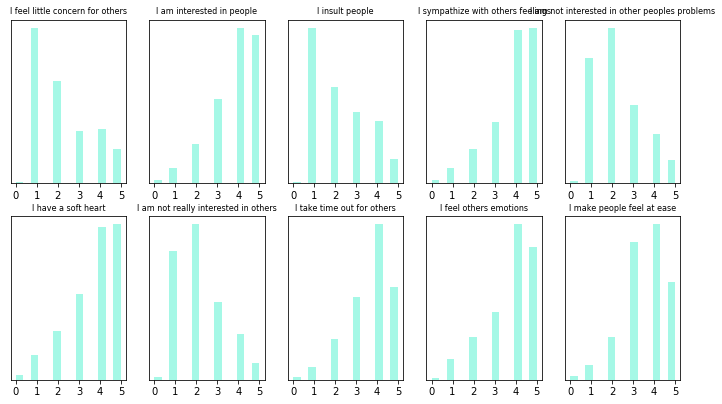

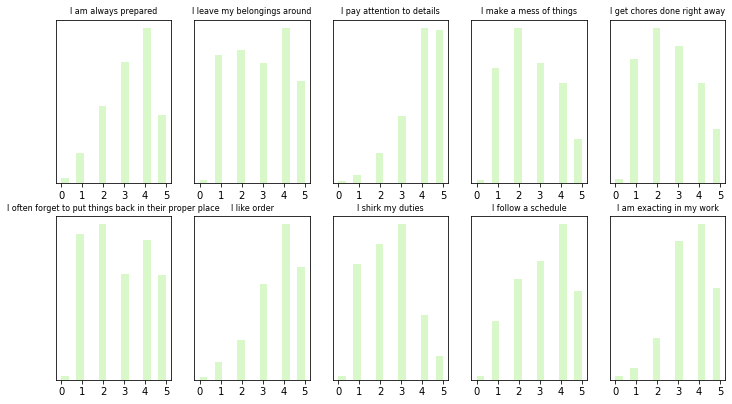

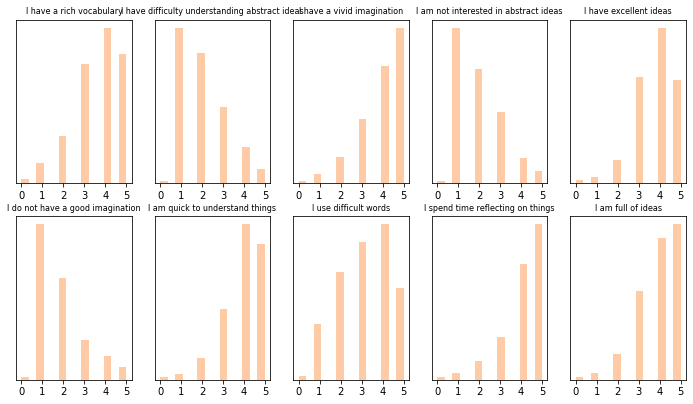

In [ ]:
#Plot all questions
for i,t in enumerate(traits):
    vis_questions(t, colours(i/5))

## How many clusters should we define?

Clustering is a task of identifying similar instances and assigning them to clusters or groups of similar interest. (Geron, 2023)

In [ ]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [ ]:
%pip install yellowbrick


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

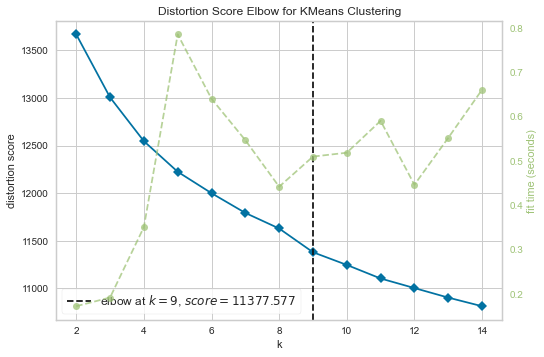

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

As you can see 5 clusters looks optimum for the data set and we already know this researh is to identify 5 different personalities.

## Clustering Participants into 5 Personality Groups



## K-Means

[K-means](http://https//www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# Use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# Define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,549499,2.0,3.0,2.0,2.0,...,4.0,3.0,3.0,4.0,3
1,811367,2.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,0
2,450151,4.0,1.0,5.0,1.0,...,5.0,5.0,5.0,5.0,3
3,919073,1.0,4.0,3.0,5.0,...,5.0,5.0,4.0,4.0,4
4,894414,3.0,1.0,4.0,3.0,...,3.0,2.0,4.0,4.0,4


## Analysing the Model and Predictions

How many individual do we have for each cluster?

In [ ]:
df_model.Clusters.value_counts()

2    10357
1    10134
3    10003
0     9809
4     9603
Name: Clusters, dtype: int64

Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [ ]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,717444.403303,2.637578,2.765929,3.248853,3.140279,3.263941,2.348252,2.738200,3.393108,2.966561,3.560404,3.289938,3.120094,3.841676,2.619533,2.822714,2.825568,3.050158,2.698236,3.103273,2.804363,2.221022,3.833418,2.288816,3.929758,2.279539,3.716485,2.197370,3.680803,3.774697,3.580997,3.311347,2.977572,3.980222,2.613722,2.592109,2.860027,3.681007,2.458253,3.179733,3.604751,3.719951,1.991029,4.026710,1.908859,3.830462,1.877256,4.006117,3.286981,4.194311,4.004995
1,311734.176732,2.672785,2.759226,3.297217,3.143773,3.292086,2.430037,2.799487,3.423327,2.957667,3.537695,3.323762,3.148017,3.887211,2.712749,2.894612,2.901322,3.091080,2.734064,3.108151,2.773239,2.326327,3.821492,2.260016,3.936353,2.272449,3.772252,2.192520,3.693408,3.814486,3.611999,3.279949,2.926090,3.995856,2.667653,2.691829,2.859878,3.685711,2.491316,3.193408,3.588810,3.611210,2.175153,3.988553,2.098678,3.759424,1.911486,3.940201,3.106572,4.074896,3.933491
2,104377.064980,2.624988,2.823887,3.270445,3.190403,3.239355,2.503235,2.766148,3.444144,2.976731,3.585980,3.216375,3.248238,3.828136,2.681665,2.806604,2.828039,3.055035,2.660616,3.101477,2.756783,2.300377,3.789032,2.353674,3.889640,2.308197,3.719996,2.238679,3.650188,3.741624,3.544076,3.265038,2.963696,3.933378,2.641499,2.562711,2.845708,3.675678,2.505552,3.148112,3.547745,3.639954,2.110070,3.987545,2.069808,3.754272,1.922082,3.969875,3.156802,4.078305,3.910882
3,516168.615915,2.644507,2.757673,3.282015,3.126162,3.285814,2.402679,2.786964,3.419374,2.978406,3.532540,3.287114,3.167450,3.834350,2.677297,2.842847,2.833550,3.042787,2.672798,3.090873,2.779266,2.277917,3.830351,2.252624,3.910127,2.252124,3.741478,2.201640,3.683895,3.781266,3.600120,3.289013,2.898830,3.994502,2.598620,2.644607,2.821953,3.719084,2.470459,3.211237,3.589923,3.645206,2.064781,4.004099,1.991303,3.817155,1.894832,3.967110,3.190243,4.126462,3.985804
4,914746.261481,2.663751,2.745913,3.325003,3.132875,3.315110,2.332396,2.788920,3.393315,2.973550,3.541914,3.296574,3.139123,3.864834,2.631886,2.829949,2.830678,3.034260,2.667708,3.052588,2.780694,2.193585,3.877226,2.176611,3.973133,2.239717,3.775070,2.164948,3.730397,3.824742,3.621368,3.358534,2.910132,3.993231,2.546600,2.687285,2.775903,3.750391,2.392586,3.271269,3.643757,3.702281,2.029158,4.007394,1.926794,3.837030,1.870249,4.012913,3.225242,4.179527,3.992711


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [ ]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.650270,3.093159,3.072627,3.123499,3.244643
1,2.677561,3.133866,3.086254,3.140369,3.225498
2,2.683934,3.101217,3.074819,3.108545,3.223646
3,2.668359,3.098161,3.071069,3.124843,3.229111
4,2.667083,3.088951,3.073612,3.130730,3.243434


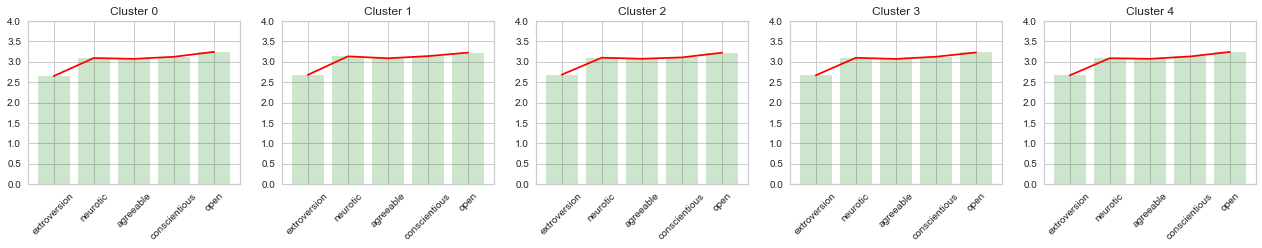

In [ ]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i,:], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i,:], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

## Visualizing the Cluster Predictions

## PCA

[Principal Component Analysis (PCA)](https://rpubs.com/cyobero/pca-clustering#:~:text=Principal%20Component%20Analysis%20(PCA)%20is%20an%20unsupervised%20machine%20learning%20technique,Visualizing%20High%2DDimensional) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.

In [ ]:
# In order to visualize in 2D graph, PCA will be used
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,44046.698174,0.308349,3
1,305914.698169,2.167283,0
2,-55301.301826,-3.933172,3
3,413620.698174,3.313766,4
4,388961.698176,-0.857681,4


Text(0.5, 1.0, 'Personality Clusters after PCA')

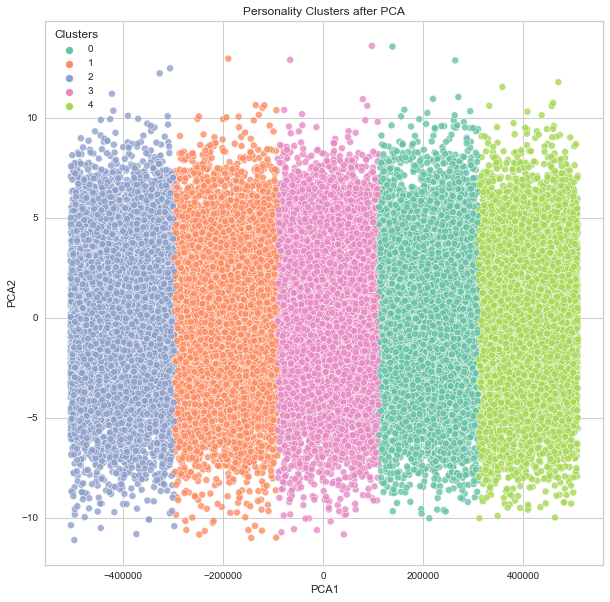

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

## Implementing the Model to See My Personality

I answered the questions in an Microsoft Excel spread sheet.
Then I added that data into this notebook and put my answers to the model to see in which category I will be.

In [ ]:
%pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:

my_data = pd.read_csv('data/data_personality.csv')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [ ]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
# my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open
0,3.0,2.4,3.4,3.3,3.4


# In class exercise
 Make an excel sheet that contains your answers to the Big Five Personality Questionnaires. You can see the template in my_data

 The way you create your data is by answering the Big Five Personality (on the scale 1 - 5 with 1 being very inacccurate to 5 very accurate) for all the questions. Save as excel or csv and input it with the corect path. You can also see the template for filling out the questionnaire here: https://artslondon-my.sharepoint.com/:x:/g/personal/u_octaviani_arts_ac_uk/EW3hJdb8R9lEt3TzFYlZRwEBT6m9zt5ov7uJJsDXFVmCTA?e=YzUfwH

As a reminder the questions are : https://ipip.ori.org/new_ipip-50-item-scale.htm

In [ ]:
# optional if you use excel. Use: pip install openpyxl
your_data = pd.read_excel ('.../your_data.csv')

In [ ]:
# Change this to your data

# col_list = list(my_data)
# ext = col_list[1:10]
# est = col_list[10:20]
# agr = col_list[20:30]
# csn = col_list[30:40]
# opn = col_list[40:50]

# my_sums = pd.DataFrame()
# my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
# my_sums['neurotic'] = my_data[est].sum(axis=1)/10
# my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
# my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
# my_sums['open'] = my_data[opn].sum(axis=1)/10
# print('Sum of my question groups')
# my_sums

# Assignment 3





# Tasks

In the questions, there is a clear self judgement bias where positive attributes (“I have a rich vocabulary) are rated higher than negative ones (“I do not have a good imagination”). This is demonstrated by steep negative or positive skews in the data

A variety of these within a trait balances itself out as we can see by the 5 personality types all having reasonably similar means (~3)

## Task 1

Add 5 extra columns, each with the aggregated trait score (the mean of the 10 questions for that trait) for that participant.

Use this to show the mean of each trait over the whole dataset

**TIPS**
You can use ``keys_for_trait()`` to slice out all the questions for a particular trait

## Task 2

Write some code to rank the five traits on how much positive and negative skew there is in response to each question.

E.g A trait where all of the questions had an equal spread of answers across 0-5 would rank lowly, and one where all the questions either skewed positively (from low to high) or negatively (from high to low) would rank highly

**TIPS**
The function ``scipy.stat.skew()`` can give you the skew of data for a specific column (e.g. one question)

Again, you can use ``keys_for_trait()`` to slice out all the questions for a particular trait

Remember, highly skewed traits will contain questions skewed both positively and negatively

In [1]:
#Task 1

import pandas as pd

# Function to calculate the aggregated trait score for a participant
def calculate_aggregated_trait_score(participant_row):
    trait_scores = []
    for trait in range(1, 6):
        trait_questions = keys_for_trait(trait)
        trait_score = participant_row[trait_questions].mean()
        trait_scores.append(trait_score)
    return trait_scores

# Add 5 extra columns for the aggregated trait scores
for trait in range(1, 6):
    trait_questions = keys_for_trait(trait)  # Function to get the questions for a trait
    data[f'Trait {trait} Score'] = data[trait_questions].mean(axis=1)

# Calculate the mean of each trait over the whole dataset
trait_means = []
for trait in range(1, 6):
    trait_mean = data[f'Trait {trait} Score'].mean()
    trait_means.append(trait_mean)

print("Mean of each trait:")
for trait, mean in enumerate(trait_means, start=1):
    print(f"Trait {trait}: {mean}")


NameError: ignored

In [2]:
#TASK 2

from scipy.stats import skew

# Function to calculate the skewness for a trait
def calculate_trait_skew(trait):
    trait_questions = keys_for_trait(trait)  # Function to get the questions for a trait
    trait_skews = []
    for question in trait_questions:
        trait_skew = skew(data[question])
        trait_skews.append(trait_skew)
    return trait_skews

# Calculate the skewness for each trait
trait_skews = []
for trait in range(1, 6):
    trait_skews.append(calculate_trait_skew(trait))

# Rank the traits based on the skewness
trait_ranking = sorted(range(1, 6), key=lambda x: abs(sum(trait_skews[x-1])), reverse=True)

print("Trait ranking based on skewness:")
for rank, trait in enumerate(trait_ranking, start=1):
    print(f"Rank {rank}: Trait {trait}")


NameError: ignored